In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Test_Scenario7.csv")

In [3]:
df1=df.drop(['ORIGIN','FLIGHT_NUMBER','DESTINATION'],axis=1)

In [4]:
df1['DEP_DATE'] = pd.to_datetime(df1['DEP_DATE']).dt.normalize()


In [5]:
df1.set_index('DEP_DATE',inplace=True)


In [6]:
df1.head()

,NET_BOOKINGS
DEP_DATE,
2017-01-01,67
2017-02-01,82
2017-03-01,71
2017-04-01,72
2017-05-01,51


<AxesSubplot:xlabel='DEP_DATE'>

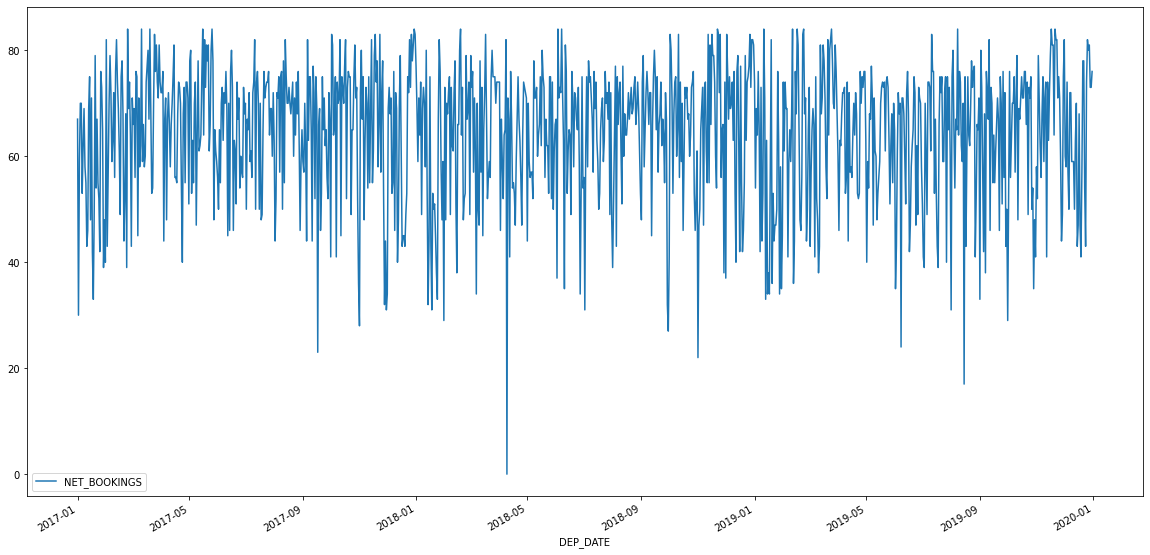

In [7]:
df1.plot(figsize=(20, 10))

In [8]:
from statsmodels.tsa.stattools import adfuller


In [9]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adfuller_test(df1['NET_BOOKINGS'])


ADF Test Statistic : -6.1199611493486135
p-value : 8.904525618243453e-08
#Lags Used : 22
Number of Observations Used : 1070
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [11]:
print(df1.shape)
train=df1.iloc[:-30]
test=df1.iloc[-30:]
print(train.shape,test.shape)

(1093, 1)
(1063, 1) (30, 1)


In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['NET_BOOKINGS'],order=(1,0,5))
model=model.fit()
model.summary()

/home/varsha/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/varsha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           NET_BOOKINGS   No. Observations:                 1063
Model:                     ARMA(1, 5)   Log Likelihood               -4151.017
Method:                       css-mle   S.D. of innovations             12.013
Date:                Sat, 18 Sep 2021   AIC                           8318.035
Time:                        13:31:56   BIC                           8357.785
Sample:                             0   HQIC                          8333.098
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 64.2861      0.763     84.246      0.000      62.790      65.782
ar.L1.NET_BOOKINGS     0.8431      0.077     10.958      0.000       0.692       0.994
ma.L1.NET_BOOKINGS    -0.5697      0.077     -7.358      0.000      -0.721      -0.418
ma.L2.NET_BOOKINGS    -0.1276      0.040     -3.188      0.001      -0.206      -0.049
ma.L3.NET_BOOKINGS    -0.0186      0.035     -0.534      0.593      -0.087       0.050
ma.L4.NET_BOOKINGS    -0.0281      0.044     -0.639      0.523      -0.114       0.058
ma.L5.NET_BOOKINGS     0.0699      0.035      2.004      0.045       0.002       0.138
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1860           +0.0000j            1.1860            0.0000
MA.1           -1.8252           -0.0000j            1.8252           -0.5000
MA.2           -0.3367           -1.8496j            1.8800           -0.2787
MA.3           -0.3367           +1.8496j            1.8800            0.2787
MA.4            1.4502           -0.3378j            1.4890           -0.0364
MA.5            1.4502           +0.3378j            1.4890            0.0364
-----------------------------------------------------------------------------
"""

/home/varsha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='DEP_DATE'>

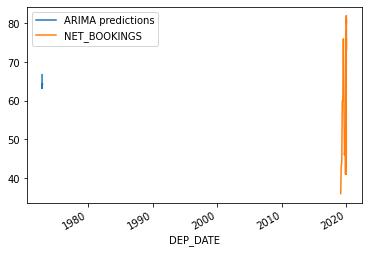

In [14]:
# start=len(train)
# end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=1063,end=1092,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['NET_BOOKINGS'].plot(legend=True)

In [15]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [16]:
print(mape(pred,test['NET_BOOKINGS']))

21.287511964081343


In [17]:
model2=ARIMA(df1['NET_BOOKINGS'],order=(1,0,5))
model2=model2.fit()
df.tail()

/home/varsha/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/varsha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated

,DEP_DATE,FLIGHT_NUMBER,ORIGIN,DESTINATION,NET_BOOKINGS
1088,27-12-2019 10:30,305,KNM,KUF,80
1089,28-12-2019 10:30,305,KNM,KUF,81
1090,29-12-2019 10:30,305,KNM,KUF,73
1091,30-12-2019 10:30,305,KNM,KUF,73
1092,31-12-2019 10:30,305,KNM,KUF,76


In [18]:
index_future_dates=pd.date_range(start='31-12-2019',end='30-1-2020')
# print(index_future_dates)
pred=model2.predict(start=len(df1),end=len(df1)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2019-12-31    70.147048
2020-01-01    68.987226
2020-01-02    68.360007
2020-01-03    67.930030
2020-01-04    67.766972
2020-01-05    67.094093
2020-01-06    66.548111
2020-01-07    66.105095
2020-01-08    65.745626
2020-01-09    65.453949
2020-01-10    65.217279
2020-01-11    65.025242
2020-01-12    64.869422
2020-01-13    64.742987
2020-01-14    64.640396
2020-01-15    64.557153
2020-01-16    64.489608
2020-01-17    64.434802
2020-01-18    64.390331
2020-01-19    64.354247
2020-01-20    64.324969
2020-01-21    64.301211
2020-01-22    64.281934
2020-01-23    64.266293
2020-01-24    64.253601
2020-01-25    64.243303
2020-01-26    64.234947
2020-01-27    64.228167
2020-01-28    64.222665
2020-01-29    64.218201
2020-01-30    64.214579
Freq: D, Name: ARIMA Predictions, dtype: float64


/home/varsha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

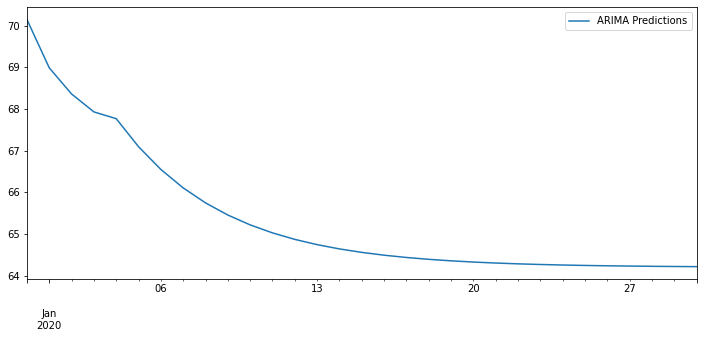

In [19]:
pred.plot(figsize=(12,5),legend=True)


<AxesSubplot:xlabel='DEP_DATE'>

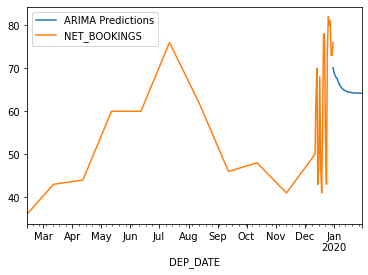

In [20]:
pred.plot(legend='ARIMA Predictions')
test['NET_BOOKINGS'].plot(legend=True)

# profet

In [21]:
!pip install prophet

You should consider upgrading via the '/home/varsha/anaconda3/bin/python -m pip install --upgrade pip' command.


In [24]:
from prophet import Prophet

In [25]:
df2=df1.reset_index()

In [26]:
df2

,DEP_DATE,NET_BOOKINGS
0,2017-01-01,67
1,2017-02-01,82
2,2017-03-01,71
3,2017-04-01,72
4,2017-05-01,51
...,...,...
1088,2019-12-27,80
1089,2019-12-28,81
1090,2019-12-29,73
1091,2019-12-30,73


In [27]:
df2.rename(columns = {'DEP_DATE':'ds','NET_BOOKINGS':'y'}, inplace = True)

In [28]:
df2

,ds,y
0,2017-01-01,67
1,2017-02-01,82
2,2017-03-01,71
3,2017-04-01,72
4,2017-05-01,51
...,...,...
1088,2019-12-27,80
1089,2019-12-28,81
1090,2019-12-29,73
1091,2019-12-30,73


In [34]:
model = Prophet(daily_seasonality=True)
modf2=model.fit(df2)

In [43]:
index_future_dates

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
               '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
               '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30'],
              dtype='datetime64[ns]', freq='D')

In [48]:
future = modf2.make_future_dataframe(periods=test.shape[1], freq='M')
future

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
1089,2019-12-28
1090,2019-12-29
1091,2019-12-30
1092,2019-12-31


In [50]:
forecast = modf2.predict(df=future)


<AxesSubplot:xlabel='DEP_DATE'>

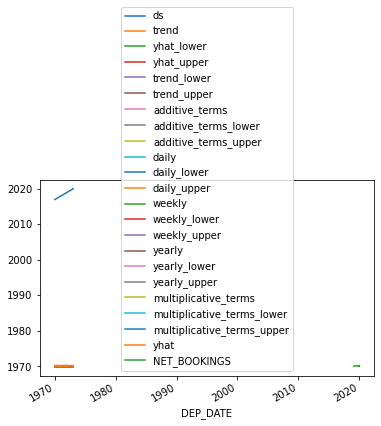

In [51]:
forecast.plot(legend='ARIMA Predictions')
test['NET_BOOKINGS'].plot(legend=True)

In [41]:
predi=modf2.predict()
predi.index=index_future_dates
print(predi)

ValueError: Length mismatch: Expected axis has 1093 elements, new values have 31 elements

In [33]:
forecast = model.predict(index_future_dates)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
fig1 = model.plot(forecast)